In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Datasets/cardata.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
print(df.shape)
df.isnull().sum()

(11914, 16)


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [5]:
df.duplicated().sum()

349

In [6]:
df.drop_duplicates(inplace=True)
df.shape

(7735, 16)

In [7]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
make_count = df['Make'].value_counts()
make_count.head(10).values

array([608, 485, 411, 396, 340, 328, 324, 321, 308, 298], dtype=int64)

In [9]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [11]:
df.head(2)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650


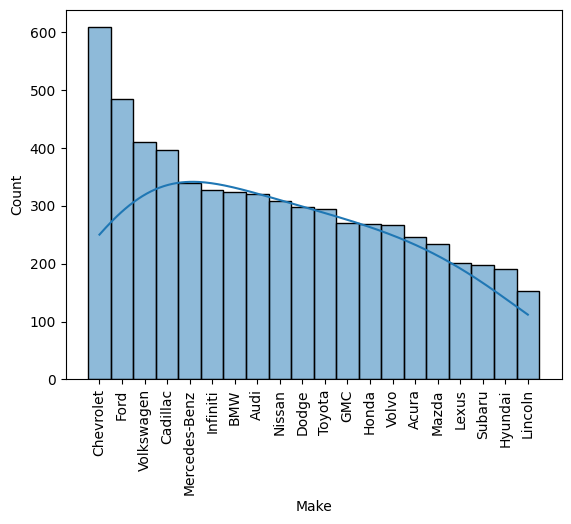

In [12]:
sns.histplot(x=make_count.head(20).index, weights=make_count.head(20).values, kde=True)
plt.xticks(rotation=90)
plt.show()

In [13]:
numeric_fields = df.select_dtypes(include=[np.number])
numeric_fields.columns

Index(['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

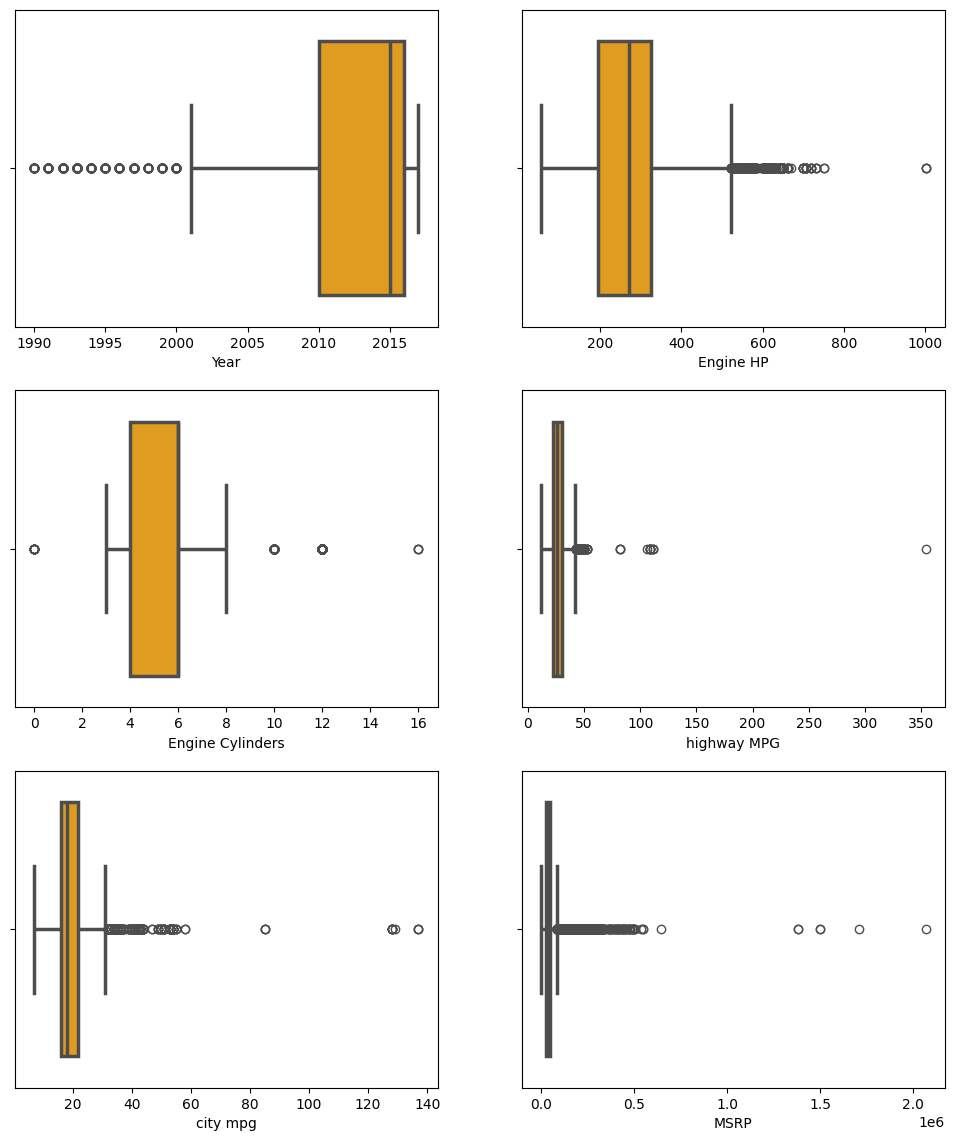

In [14]:
plt.figure(figsize=(12,14))
for i, cols in enumerate (numeric_fields):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, linewidth=2.5, x=cols, color='orange')
plt.show()

In [15]:
q1 = numeric_fields.quantile(0.25)
q3 = numeric_fields.quantile(0.75)
iqr = q3 - q1
iqr

Year                    6.0
Engine HP             131.0
Engine Cylinders        2.0
highway MPG             8.0
city mpg                6.0
MSRP                23252.5
dtype: float64

In [16]:
clr_df = numeric_fields[~(numeric_fields < (q1 - 1.5 * iqr) | (numeric_fields > (q3 + 1.5 * iqr)))]
clr_df.head()

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500


([0, 1, 2, 3, 4],
 [Text(0, 0, 'MANUAL'),
  Text(1, 0, 'AUTOMATIC'),
  Text(2, 0, 'AUTOMATED_MANUAL'),
  Text(3, 0, 'DIRECT_DRIVE'),
  Text(4, 0, 'UNKNOWN')])

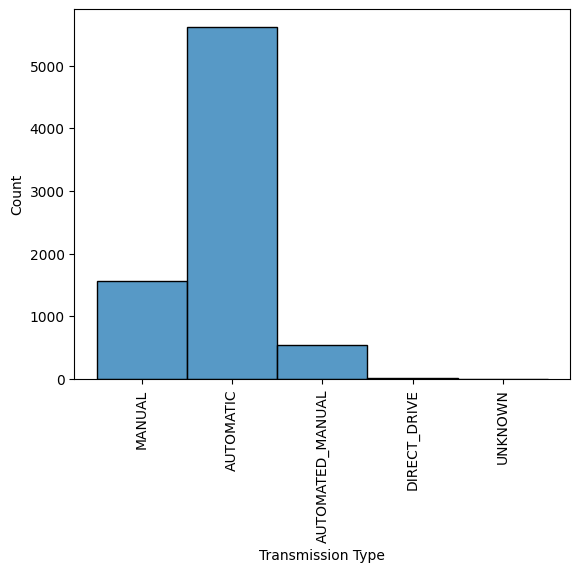

In [17]:
sns.histplot(df['Transmission Type'])
plt.xticks(rotation=90)


,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
Year,1.000000,0.234461,-0.051369,0.219893,0.183083,0.125162
Engine HP,0.234461,1.000000,0.811138,-0.468328,-0.510151,0.655522
Engine Cylinders,-0.051369,0.811138,1.000000,-0.597864,-0.613399,0.589557
highway MPG,0.219893,-0.468328,-0.597864,1.000000,0.818331,-0.255595
city mpg,0.183083,-0.510151,-0.613399,0.818331,1.000000,-0.266632
MSRP,0.125162,0.655522,0.589557,-0.255595,-0.266632,1.000000


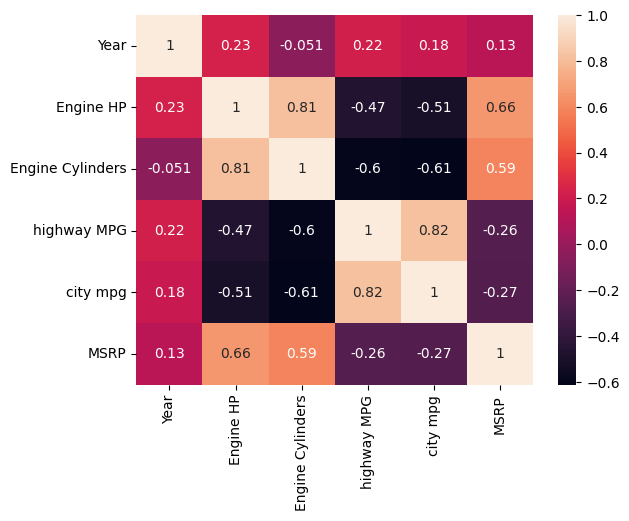

In [18]:
corr = numeric_fields.corr()
sns.heatmap(corr, annot=True)
corr


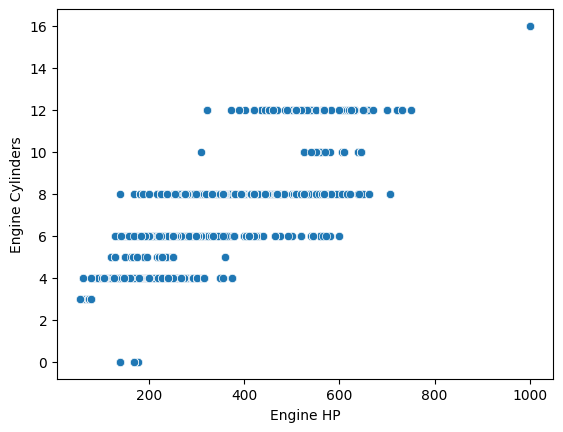

In [19]:
sns.scatterplot(x='Engine HP', y='Engine Cylinders', data=numeric_fields)
plt.show()